# Simple Linear Regression on MBTA Orange Line

**Assignment Due Date:** End of Day Friday November 30th

**Submission:** Submit just this notebook to James through email by the above due date. You can also share the homework via email using an online storage (e.g. Box, Google Drive)

Build a simple linear regression model for the MBTA subway Orange Line.  Your model should have the following constraints:
- 1)Use both September and October historical data for Orange Line to build model ('mbta_Orange_09_2018.json' and 'mbta_Orange_10_2018.json')
- 2)Regression model is for the direction of train moving from Forest Hills to Oak Grove (opposite direction should be removed)
- 3)Regression model should be for trips that occur on Saturday and only between 7am - 10pm (all other days and time outside the specified range should not be included in the regression model)
- 4)Unique trips for a specific day that have under 40 vehicle updates should removed
- 5)Unique trips for a specific day in which the vehicle updates do not begin at Forest Hills should be removed
- 6)The dependent variable should be the elapsed time since trip's began and should be represented in 'hour' unit 
- 7)The independent variable should be distance traveled from start and should be represented in 'kilometer' unit

Please tag the portion of your code that handles each of the above constraints with '#CONSTRAINT{bullet-number}.'  For example if you are filtering out any trips that do not occur on Saturday.  Prior to the logic that performs this put a comment '#CONSTRAINT3.'  If you have logic for a specific constraint spread throughout the notebook please tag each piece. 

Plot your simple linear regression model and include a scatter plot for the testing and training dataset.

You are encouraged to reuse the logic from the lectures to complete this assignment.  The historical datasets used to build the regression model can be found here:  https://umass.app.box.com/s/x3zgwv34uduqrxnwkako4rbkjayzabt1/folder/56231379908 . 

Full credit given to if entire work is shown and follows the above constraints.  This homework is an individual assignment.  The code will be re-run locally and that runtime output is what will be graded, not the output displayed when submitted. **Please be sure your code runs as expected from the start of the notebook to the end.**

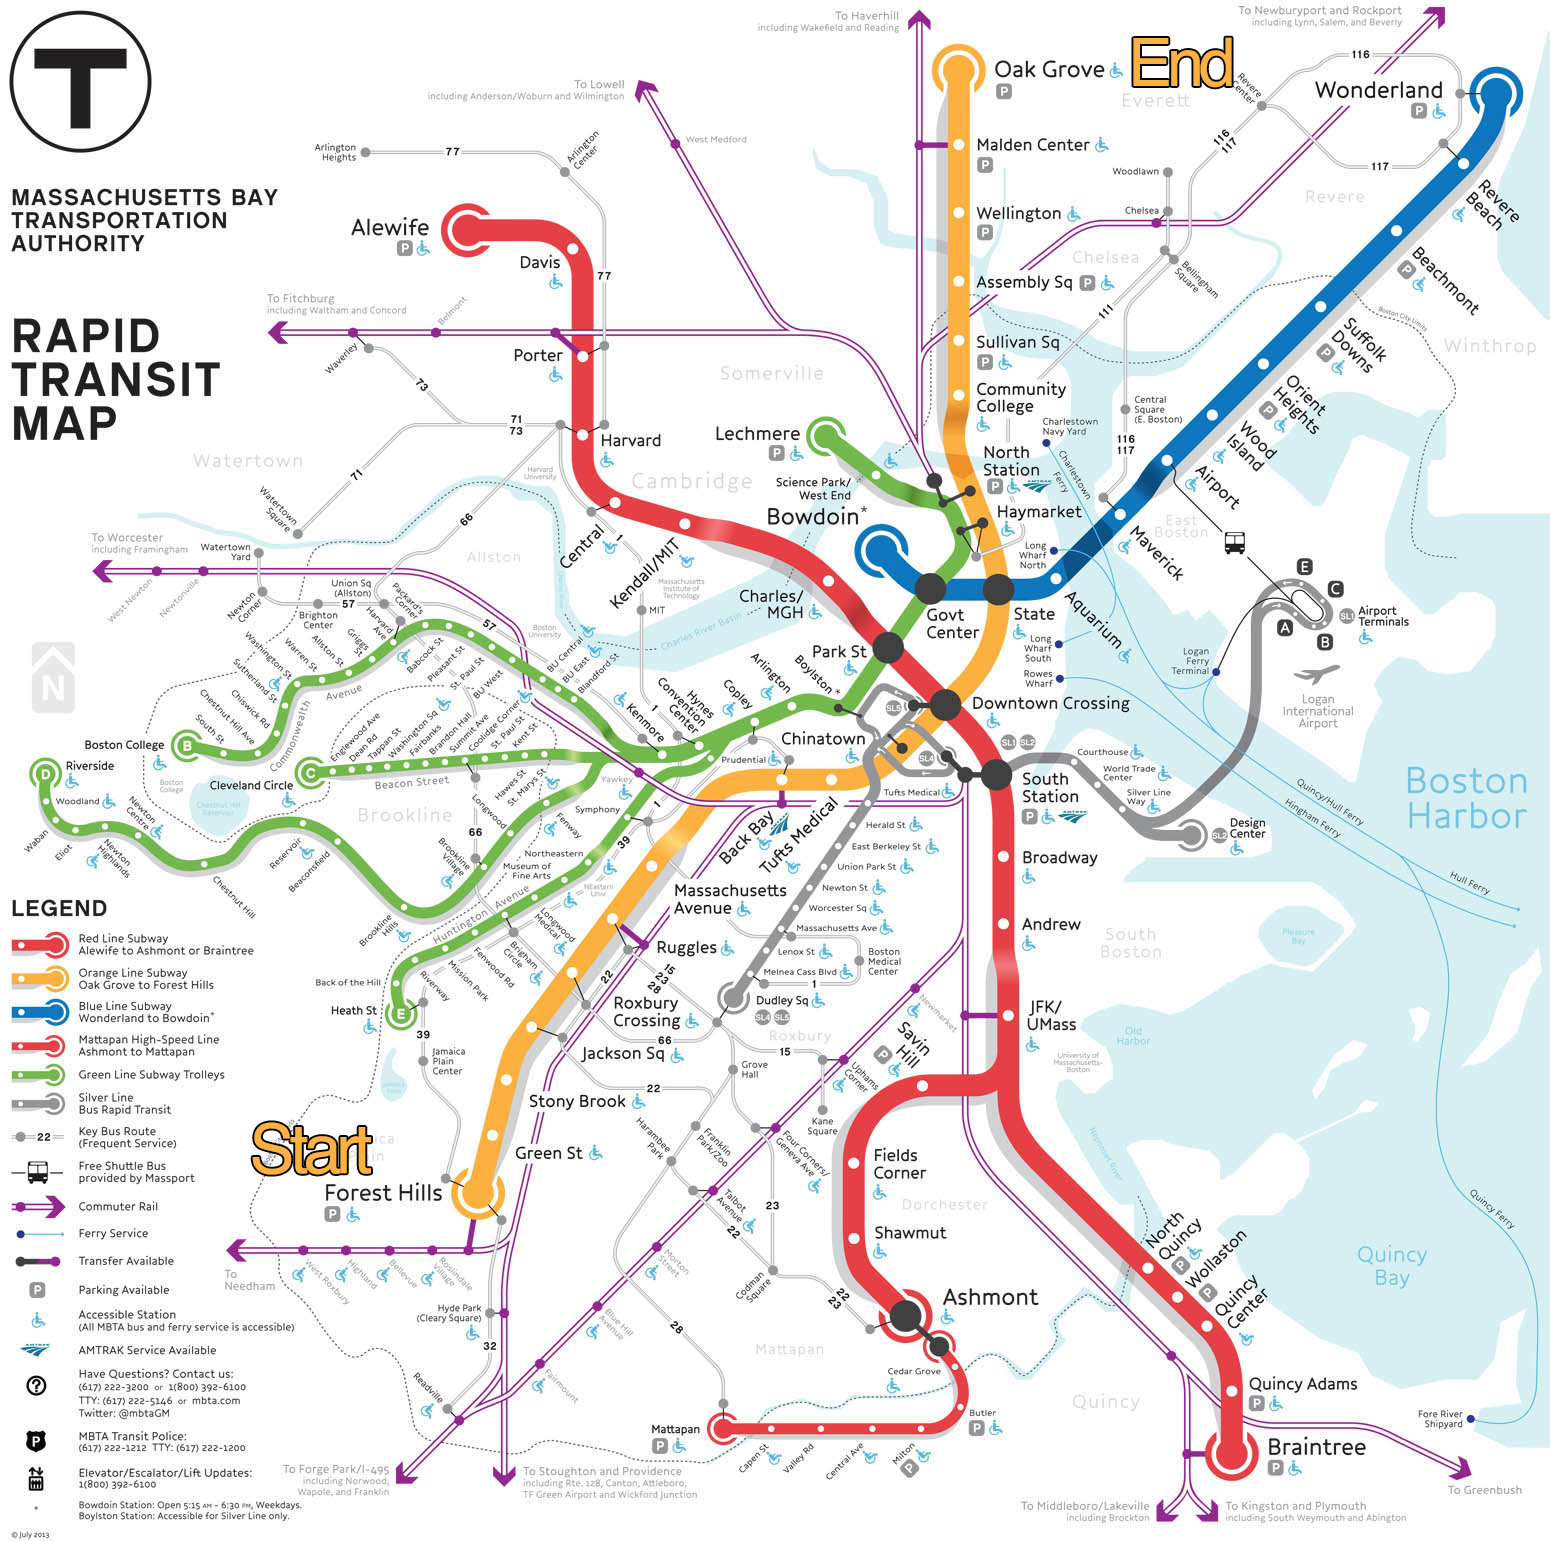

Example plot of Orange Line to Oak Groves distance traveled vs time elapsed:

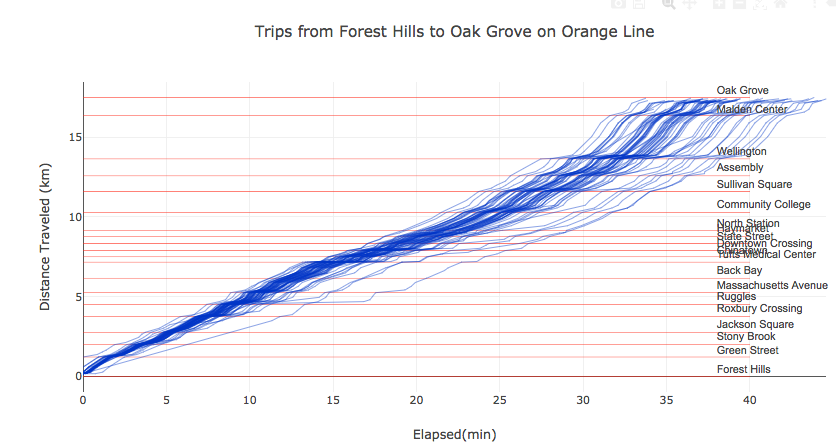

Example plot of simple linear regression model with scatter plot of testing and training dataset:

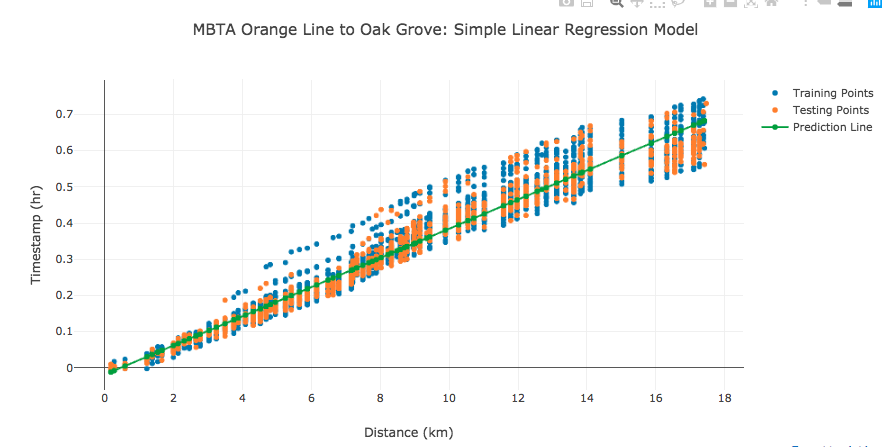

# CONSTRAINT 1

In [2]:
import pandas as pd
import json
import requests
from geopy import distance
import plotly as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

The datasets of both September and October is obtained from the given URL and then combined at the end of Constraint 1 to get the DataFrame of the combined months.

In [3]:
with open('D:/First Sem/IOT/Programming Assignments/IOT-Homework-P3/mbta_Orange_09_2018.json') as file1:
    data1 = json.load(file1)

In [4]:
df1 = pd.io.json.json_normalize(data1, record_path='Vehicles')
df1

Id     Type                  UpdatedAt  Speed  Longitude  \
0       O-5457D94B  vehicle  2018-08-31T19:56:16-04:00      0  -71.10796   
1       O-5457DE49  vehicle  2018-08-31T19:59:25-04:00      0  -71.06641   
2       O-5457E099  vehicle  2018-08-31T19:59:27-04:00      0  -71.07683   
3       O-5457D346  vehicle  2018-08-31T19:54:48-04:00      0  -71.07465   
4       O-5457DE17  vehicle  2018-08-31T19:52:38-04:00      0  -71.11384   
...            ...      ...                        ...    ...        ...   
429749  O-54587D66  vehicle  2018-09-30T19:58:22-04:00      0  -71.07715   
429750  O-54587D4B  vehicle  2018-09-30T19:58:51-04:00      0  -71.06710   
429751  O-54587D02  vehicle  2018-09-30T19:58:24-04:00      0  -71.06059   
429752  O-54587D4B  vehicle  2018-09-30T19:58:59-04:00      0  -71.06600   
429753  O-54587D4A  vehicle  2018-09-30T19:58:59-04:00      0  -71.06641   

        Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  \
0       42.31005  1208            0                  180     STOPPED_AT   
1       42.34806  1219            0                  120    INCOMING_AT   
2       42.41500  1220            1                  180    INCOMING_AT   
3       42.34758  1232            1                   70     STOPPED_AT   
4       42.30122  1245            1                    1     STOPPED_AT   
...          ...   ...          ...                  ...            ...   
429749  42.39250  1295            1                  160     STOPPED_AT   
429750  42.37216  1216            0                   60  IN_TRANSIT_TO   
429751  42.35533  1246            1                  100     STOPPED_AT   
429752  42.37147  1216            0                   60  IN_TRANSIT_TO   
429753  42.34806  1225            0                  120    INCOMING_AT   

        Bearing StopId            TripId RouteId  
0           210  70002          37641807  Orange  
1           230  70014          37641839  Orange  
2           357  70035          37642043  Orange  
3            85  70015          37642044  Orange  
4           210  70001          37641875  Orange  
...         ...    ...               ...     ...  
429749      355  70279  ADDED-1538079926  Orange  
429750      125  70026  ADDED-1538079619  Orange  
429751       25  70021  ADDED-1538079941  Orange  
429752      125  70026  ADDED-1538079619  Orange  
429753      230  70014  ADDED-1538079618  Orange  

[429754 rows x 14 columns]

In [5]:
toDropList1 = "Speed Type Bearing Label RouteId".split()
df1.drop(toDropList1, axis=1)
df1

Id     Type                  UpdatedAt  Speed  Longitude  \
0       O-5457D94B  vehicle  2018-08-31T19:56:16-04:00      0  -71.10796   
1       O-5457DE49  vehicle  2018-08-31T19:59:25-04:00      0  -71.06641   
2       O-5457E099  vehicle  2018-08-31T19:59:27-04:00      0  -71.07683   
3       O-5457D346  vehicle  2018-08-31T19:54:48-04:00      0  -71.07465   
4       O-5457DE17  vehicle  2018-08-31T19:52:38-04:00      0  -71.11384   
...            ...      ...                        ...    ...        ...   
429749  O-54587D66  vehicle  2018-09-30T19:58:22-04:00      0  -71.07715   
429750  O-54587D4B  vehicle  2018-09-30T19:58:51-04:00      0  -71.06710   
429751  O-54587D02  vehicle  2018-09-30T19:58:24-04:00      0  -71.06059   
429752  O-54587D4B  vehicle  2018-09-30T19:58:59-04:00      0  -71.06600   
429753  O-54587D4A  vehicle  2018-09-30T19:58:59-04:00      0  -71.06641   

        Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  \
0       42.31005  1208            0                  180     STOPPED_AT   
1       42.34806  1219            0                  120    INCOMING_AT   
2       42.41500  1220            1                  180    INCOMING_AT   
3       42.34758  1232            1                   70     STOPPED_AT   
4       42.30122  1245            1                    1     STOPPED_AT   
...          ...   ...          ...                  ...            ...   
429749  42.39250  1295            1                  160     STOPPED_AT   
429750  42.37216  1216            0                   60  IN_TRANSIT_TO   
429751  42.35533  1246            1                  100     STOPPED_AT   
429752  42.37147  1216            0                   60  IN_TRANSIT_TO   
429753  42.34806  1225            0                  120    INCOMING_AT   

        Bearing StopId            TripId RouteId  
0           210  70002          37641807  Orange  
1           230  70014          37641839  Orange  
2           357  70035          37642043  Orange  
3            85  70015          37642044  Orange  
4           210  70001          37641875  Orange  
...         ...    ...               ...     ...  
429749      355  70279  ADDED-1538079926  Orange  
429750      125  70026  ADDED-1538079619  Orange  
429751       25  70021  ADDED-1538079941  Orange  
429752      125  70026  ADDED-1538079619  Orange  
429753      230  70014  ADDED-1538079618  Orange  

[429754 rows x 14 columns]

In [6]:
with open('D:/First Sem/IOT/Programming Assignments/IOT-Homework-P3/mbta_Orange_10_2018.json') as file2:
    data2 = json.load(file2)

In [7]:
df2 = pd.io.json.json_normalize(data2, record_path='Vehicles')
df2

Id     Type                  UpdatedAt  Speed  Longitude  \
0       O-54587D4B  vehicle  2018-09-30T20:01:55-04:00      0  -71.05920   
1       O-54587D4A  vehicle  2018-09-30T20:02:30-04:00      0  -71.08425   
2       O-54587D02  vehicle  2018-09-30T20:02:16-04:00      0  -71.05958   
3       O-54587D63  vehicle  2018-09-30T20:02:06-04:00      0  -71.07213   
4       O-54587D66  vehicle  2018-09-30T20:02:27-04:00      0  -71.07698   
...            ...      ...                        ...    ...        ...   
461739  O-545923BF  vehicle  2018-10-31T19:59:12-04:00      0  -71.07707   
461740  O-545923DE  vehicle  2018-10-31T19:58:52-04:00      0  -71.06467   
461741  O-54591E13  vehicle  2018-10-31T19:59:05-04:00      0  -71.09157   
461742  O-545923C0  vehicle  2018-10-31T19:59:26-04:00      0  -71.07723   
461743  O-54591854  vehicle  2018-10-31T19:59:21-04:00      0  -71.06004   

        Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  \
0       42.36424  1216            0                   70    INCOMING_AT   
1       42.34093  1225            0                  130     STOPPED_AT   
2       42.36473  1246            1                  130    INCOMING_AT   
3       42.43223  1260            0                   10    INCOMING_AT   
4       42.40413  1295            1                  180  IN_TRANSIT_TO   
...          ...   ...          ...                  ...            ...   
461739  42.38868  1252            0                   40    INCOMING_AT   
461740  42.34880  1297            0                  110     STOPPED_AT   
461741  42.33483  1304            0                  150    INCOMING_AT   
461742  42.39790  1241            1                  170    INCOMING_AT   
461743  42.36516  1244            0                   60     STOPPED_AT   

        Bearing StopId            TripId RouteId  
0           150  70024  ADDED-1538079619  Orange  
1           220  70012  ADDED-1538079618  Orange  
2           330  70027  ADDED-1538079941  Orange  
3           200  70034  ADDED-1538079620  Orange  
4           357  70035  ADDED-1538079926  Orange  
...         ...    ...               ...     ...  
461739      175  70030          37940120  Orange  
461740      230  70016          37940088  Orange  
461741      220  70008          37940224  Orange  
461742        5  70033          37940339  Orange  
461743      150  70026          37940129  Orange  

[461744 rows x 14 columns]

In [8]:
toDropList2 = "Speed Type Bearing Label RouteId".split()
df2.drop(toDropList2, axis=1)
df2

Id     Type                  UpdatedAt  Speed  Longitude  \
0       O-54587D4B  vehicle  2018-09-30T20:01:55-04:00      0  -71.05920   
1       O-54587D4A  vehicle  2018-09-30T20:02:30-04:00      0  -71.08425   
2       O-54587D02  vehicle  2018-09-30T20:02:16-04:00      0  -71.05958   
3       O-54587D63  vehicle  2018-09-30T20:02:06-04:00      0  -71.07213   
4       O-54587D66  vehicle  2018-09-30T20:02:27-04:00      0  -71.07698   
...            ...      ...                        ...    ...        ...   
461739  O-545923BF  vehicle  2018-10-31T19:59:12-04:00      0  -71.07707   
461740  O-545923DE  vehicle  2018-10-31T19:58:52-04:00      0  -71.06467   
461741  O-54591E13  vehicle  2018-10-31T19:59:05-04:00      0  -71.09157   
461742  O-545923C0  vehicle  2018-10-31T19:59:26-04:00      0  -71.07723   
461743  O-54591854  vehicle  2018-10-31T19:59:21-04:00      0  -71.06004   

        Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  \
0       42.36424  1216            0                   70    INCOMING_AT   
1       42.34093  1225            0                  130     STOPPED_AT   
2       42.36473  1246            1                  130    INCOMING_AT   
3       42.43223  1260            0                   10    INCOMING_AT   
4       42.40413  1295            1                  180  IN_TRANSIT_TO   
...          ...   ...          ...                  ...            ...   
461739  42.38868  1252            0                   40    INCOMING_AT   
461740  42.34880  1297            0                  110     STOPPED_AT   
461741  42.33483  1304            0                  150    INCOMING_AT   
461742  42.39790  1241            1                  170    INCOMING_AT   
461743  42.36516  1244            0                   60     STOPPED_AT   

        Bearing StopId            TripId RouteId  
0           150  70024  ADDED-1538079619  Orange  
1           220  70012  ADDED-1538079618  Orange  
2           330  70027  ADDED-1538079941  Orange  
3           200  70034  ADDED-1538079620  Orange  
4           357  70035  ADDED-1538079926  Orange  
...         ...    ...               ...     ...  
461739      175  70030          37940120  Orange  
461740      230  70016          37940088  Orange  
461741      220  70008          37940224  Orange  
461742        5  70033          37940339  Orange  
461743      150  70026          37940129  Orange  

[461744 rows x 14 columns]

In [9]:
frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)
df

Id     Type                  UpdatedAt  Speed  Longitude  \
0       O-5457D94B  vehicle  2018-08-31T19:56:16-04:00      0  -71.10796   
1       O-5457DE49  vehicle  2018-08-31T19:59:25-04:00      0  -71.06641   
2       O-5457E099  vehicle  2018-08-31T19:59:27-04:00      0  -71.07683   
3       O-5457D346  vehicle  2018-08-31T19:54:48-04:00      0  -71.07465   
4       O-5457DE17  vehicle  2018-08-31T19:52:38-04:00      0  -71.11384   
...            ...      ...                        ...    ...        ...   
891493  O-545923BF  vehicle  2018-10-31T19:59:12-04:00      0  -71.07707   
891494  O-545923DE  vehicle  2018-10-31T19:58:52-04:00      0  -71.06467   
891495  O-54591E13  vehicle  2018-10-31T19:59:05-04:00      0  -71.09157   
891496  O-545923C0  vehicle  2018-10-31T19:59:26-04:00      0  -71.07723   
891497  O-54591854  vehicle  2018-10-31T19:59:21-04:00      0  -71.06004   

        Latitude Label  DirectionId  CurrentStopSequence CurrentStatus  \
0       42.31005  1208            0                  180    STOPPED_AT   
1       42.34806  1219            0                  120   INCOMING_AT   
2       42.41500  1220            1                  180   INCOMING_AT   
3       42.34758  1232            1                   70    STOPPED_AT   
4       42.30122  1245            1                    1    STOPPED_AT   
...          ...   ...          ...                  ...           ...   
891493  42.38868  1252            0                   40   INCOMING_AT   
891494  42.34880  1297            0                  110    STOPPED_AT   
891495  42.33483  1304            0                  150   INCOMING_AT   
891496  42.39790  1241            1                  170   INCOMING_AT   
891497  42.36516  1244            0                   60    STOPPED_AT   

        Bearing StopId    TripId RouteId  
0           210  70002  37641807  Orange  
1           230  70014  37641839  Orange  
2           357  70035  37642043  Orange  
3            85  70015  37642044  Orange  
4           210  70001  37641875  Orange  
...         ...    ...       ...     ...  
891493      175  70030  37940120  Orange  
891494      230  70016  37940088  Orange  
891495      220  70008  37940224  Orange  
891496        5  70033  37940339  Orange  
891497      150  70026  37940129  Orange  

[891498 rows x 14 columns]

In [10]:
df.sort_values(["Id",'UpdatedAt'], inplace=True)

# CONSTRAINT 2

Since the regression model should be from the direction Forest Hill to Oak Grove, DirectionId is set to '1'.

In [11]:
df = df[df['DirectionId']==1]
len(df['StopId'].unique())

23

# CONSTRAINT 3

The DataFrame is filtered to get the 'Saturdays' of 2 months between 7am and 10pm. And the 'ADDED-" stops are removed.

In [12]:
df['UpdatedAt'] = pd.to_datetime(df['UpdatedAt'])
df['day'] = df['UpdatedAt'].dt.dayofyear
df['hour'] = df['UpdatedAt'].dt.hour
df = df[(df['UpdatedAt'].dt.hour>=7) & (df['UpdatedAt'].dt.hour<=22)]
df['IsSaturday'] = df['UpdatedAt'].dt.dayofweek == 5
df


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

Id     Type                 UpdatedAt  Speed  Longitude  \
3       O-5457D346  vehicle 2018-08-31 19:54:48-04:00      0  -71.07465   
38      O-5457D346  vehicle 2018-08-31 20:03:24-04:00      0  -71.06966   
42      O-5457D346  vehicle 2018-08-31 20:03:37-04:00      0  -71.06723   
47      O-5457D346  vehicle 2018-08-31 20:04:37-04:00      0  -71.06468   
58      O-5457D346  vehicle 2018-08-31 20:05:34-04:00      0  -71.06375   
...            ...      ...                       ...    ...        ...   
889593  O-545926D3  vehicle 2018-10-31 18:09:30-04:00      0  -71.07428   
889617  O-545926D3  vehicle 2018-10-31 18:10:52-04:00      0  -71.07350   
889626  O-545926D3  vehicle 2018-10-31 18:11:08-04:00      0  -71.07290   
889634  O-545926D3  vehicle 2018-10-31 18:11:21-04:00      0  -71.07161   
889656  O-545926D3  vehicle 2018-10-31 18:12:16-04:00      0  -71.07123   

        Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  \
3       42.34758  1232            1                   70     STOPPED_AT   
38      42.34757  1232            1                   80    INCOMING_AT   
42      42.34759  1232            1                   80    INCOMING_AT   
47      42.34878  1232            1                   80     STOPPED_AT   
58      42.35002  1232            1                   90    INCOMING_AT   
...          ...   ...          ...                  ...            ...   
889593  42.42668  1232            1                  180     STOPPED_AT   
889617  42.42861  1232            1                  190  IN_TRANSIT_TO   
889626  42.43014  1232            1                  190  IN_TRANSIT_TO   
889634  42.43342  1232            1                  190  IN_TRANSIT_TO   
889656  42.43489  1232            1                  190    INCOMING_AT   

        Bearing StopId    TripId RouteId  day  hour  IsSaturday  
3            85  70015  37642044  Orange  243    19       False  
38           85  70017  37642044  Orange  243    20       False  
42           50  70017  37642044  Orange  243    20       False  
47           50  70017  37642044  Orange  243    20       False  
58           25  70019  37642044  Orange  243    20       False  
...         ...    ...       ...     ...  ...   ...         ...  
889593       20  70035  37940335  Orange  304    18       False  
889617       20  70036  37940335  Orange  304    18       False  
889626       20  70036  37940335  Orange  304    18       False  
889634       20  70036  37940335  Orange  304    18       False  
889656        5  70036  37940335  Orange  304    18       False  

[385896 rows x 17 columns]

In [13]:
df = df[df['IsSaturday']]
df

Id     Type                 UpdatedAt  Speed  Longitude  \
3682    O-5457E3A7  vehicle 2018-09-01 07:02:43-04:00      0  -71.08695   
3685    O-5457E3A7  vehicle 2018-09-01 07:02:58-04:00      0  -71.08571   
3688    O-5457E3A7  vehicle 2018-09-01 07:03:15-04:00      0  -71.08410   
3690    O-5457E3A7  vehicle 2018-09-01 07:04:10-04:00      0  -71.08192   
3696    O-5457E3A7  vehicle 2018-09-01 07:04:49-04:00      0  -71.07814   
...            ...      ...                       ...    ...        ...   
833609  O-54591290  vehicle 2018-10-27 22:44:23-04:00      0  -71.07428   
833621  O-54591290  vehicle 2018-10-27 22:45:36-04:00      0  -71.07350   
833624  O-54591290  vehicle 2018-10-27 22:45:55-04:00      0  -71.07290   
833627  O-54591290  vehicle 2018-10-27 22:46:11-04:00      0  -71.07161   
833633  O-54591290  vehicle 2018-10-27 22:47:10-04:00      0  -71.07123   

        Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  \
3682    42.33854  1263            1                   60    INCOMING_AT   
3685    42.33951  1263            1                   60    INCOMING_AT   
3688    42.34086  1263            1                   60     STOPPED_AT   
3690    42.34257  1263            1                   70  IN_TRANSIT_TO   
3696    42.34571  1263            1                   70    INCOMING_AT   
...          ...   ...          ...                  ...            ...   
833609  42.42668  1249            1                  180     STOPPED_AT   
833621  42.42861  1249            1                  190  IN_TRANSIT_TO   
833624  42.43014  1249            1                  190  IN_TRANSIT_TO   
833627  42.43342  1249            1                  190    INCOMING_AT   
833633  42.43489  1249            1                  190    INCOMING_AT   

        Bearing StopId            TripId RouteId  day  hour  IsSaturday  
3682         40  70013  ADDED-1535511531  Orange  244     7        True  
3685         40  70013  ADDED-1535511531  Orange  244     7        True  
3688         40  70013  ADDED-1535511531  Orange  244     7        True  
3690         40  70015  ADDED-1535511531  Orange  244     7        True  
3696         40  70015  ADDED-1535511531  Orange  244     7        True  
...         ...    ...               ...     ...  ...   ...         ...  
833609       20  70035          38018348  Orange  300    22        True  
833621       20  70036          38018348  Orange  300    22        True  
833624       20  70036          38018348  Orange  300    22        True  
833627       20  70036          38018348  Orange  300    22        True  
833633        5  70036          38018348  Orange  300    22        True  

[26800 rows x 17 columns]

In [14]:
df['day'].unique()

array([244, 251, 258, 265, 272, 279, 286, 293, 300], dtype=int64)

In [15]:
df = df[~df['TripId'].str.contains('ADDED-')]
df

Id     Type                 UpdatedAt  Speed  Longitude  \
823300  O-5458F8A7  vehicle 2018-10-27 07:05:37-04:00      0  -71.11376   
823349  O-5458F8A7  vehicle 2018-10-27 07:09:26-04:00      0  -71.11312   
823354  O-5458F8A7  vehicle 2018-10-27 07:09:48-04:00      0  -71.11258   
823357  O-5458F8A7  vehicle 2018-10-27 07:10:07-04:00      0  -71.11077   
823368  O-5458F8A7  vehicle 2018-10-27 07:11:04-04:00      0  -71.10782   
...            ...      ...                       ...    ...        ...   
833609  O-54591290  vehicle 2018-10-27 22:44:23-04:00      0  -71.07428   
833621  O-54591290  vehicle 2018-10-27 22:45:36-04:00      0  -71.07350   
833624  O-54591290  vehicle 2018-10-27 22:45:55-04:00      0  -71.07290   
833627  O-54591290  vehicle 2018-10-27 22:46:11-04:00      0  -71.07161   
833633  O-54591290  vehicle 2018-10-27 22:47:10-04:00      0  -71.07123   

        Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  \
823300  42.30119  1223            1                    1     STOPPED_AT   
823349  42.30213  1295            1                   10  IN_TRANSIT_TO   
823354  42.30290  1295            1                   10  IN_TRANSIT_TO   
823357  42.30540  1295            1                   10    INCOMING_AT   
823368  42.31001  1295            1                   10     STOPPED_AT   
...          ...   ...          ...                  ...            ...   
833609  42.42668  1249            1                  180     STOPPED_AT   
833621  42.42861  1249            1                  190  IN_TRANSIT_TO   
833624  42.43014  1249            1                  190  IN_TRANSIT_TO   
833627  42.43342  1249            1                  190    INCOMING_AT   
833633  42.43489  1249            1                  190    INCOMING_AT   

        Bearing StopId    TripId RouteId  day  hour  IsSaturday  
823300      210  70001  38018204  Orange  300     7        True  
823349       30  70003  38018204  Orange  300     7        True  
823354       30  70003  38018204  Orange  300     7        True  
823357       30  70003  38018204  Orange  300     7        True  
823368       30  70003  38018204  Orange  300     7        True  
...         ...    ...       ...     ...  ...   ...         ...  
833609       20  70035  38018348  Orange  300    22        True  
833621       20  70036  38018348  Orange  300    22        True  
833624       20  70036  38018348  Orange  300    22        True  
833627       20  70036  38018348  Orange  300    22        True  
833633        5  70036  38018348  Orange  300    22        True  

[5278 rows x 17 columns]

In [16]:
len(df['StopId'].unique())

20

# CONSTRAINT 4

Vehicle Updates less than 40 updtaes are filtered.

In [17]:
grouping = ['TripId','day']
fDf = df.groupby(grouping).filter(lambda x: x['CurrentStatus'].count()>40)

# CONSTRAINT 5

The stops for Orange line obtained from the Web API and the data is retrieved from it. The unique stops is obtained and inner merge is done with all the stops of MBTA to get the common stops.

In [18]:
url = "https://api-v3.mbta.com/stops?page%5Boffset%5D=0&page%5Blimit%5D=100&filter%5Bdirection_id%5D=1&filter%5Broute%5D=Orange" 

r = requests.get(url)
OrangeStops = json.loads(r.content)
OrangeStops

{'data': [{'attributes': {'address': 'Washington St and Hyde Park Ave, Jamaica Plain, MA 02130',
    'at_street': None,
    'description': None,
    'latitude': 42.300523,
    'location_type': 1,
    'longitude': -71.113686,
    'municipality': 'Boston',
    'name': 'Forest Hills',
    'on_street': None,
    'platform_code': None,
    'platform_name': None,
    'vehicle_type': None,
    'wheelchair_boarding': 1},
   'id': 'place-forhl',
   'links': {'self': '/stops/place-forhl'},
   'relationships': {'child_stops': {},
    'facilities': {'links': {'related': '/facilities/?filter[stop]=place-forhl'}},
    'parent_station': {'data': None},
    'recommended_transfers': {},
    'zone': {'data': {'id': 'CR-zone-1A', 'type': 'zone'}}},
   'type': 'stop'},
  {'attributes': {'address': '150 Green St, Jamaica Plain, MA',
    'at_street': None,
    'description': None,
    'latitude': 42.310525,
    'location_type': 1,
    'longitude': -71.107414,
    'municipality': 'Boston',
    'name': 'Green

In [19]:
for stop in OrangeStops['data']:
    stop['latitude'] = stop['attributes']['latitude']
    stop['longitude'] = stop['attributes']['longitude']
    stop['name'] = stop['attributes']['name']
    stop.pop('links')
    stop.pop('attributes')
    stop.pop('relationships')

OrangeStops['data']

[{'id': 'place-forhl',
  'type': 'stop',
  'latitude': 42.300523,
  'longitude': -71.113686,
  'name': 'Forest Hills'},
 {'id': 'place-grnst',
  'type': 'stop',
  'latitude': 42.310525,
  'longitude': -71.107414,
  'name': 'Green Street'},
 {'id': 'place-sbmnl',
  'type': 'stop',
  'latitude': 42.317062,
  'longitude': -71.104248,
  'name': 'Stony Brook'},
 {'id': 'place-jaksn',
  'type': 'stop',
  'latitude': 42.323132,
  'longitude': -71.099592,
  'name': 'Jackson Square'},
 {'id': 'place-rcmnl',
  'type': 'stop',
  'latitude': 42.331397,
  'longitude': -71.095451,
  'name': 'Roxbury Crossing'},
 {'id': 'place-rugg',
  'type': 'stop',
  'latitude': 42.336377,
  'longitude': -71.088961,
  'name': 'Ruggles'},
 {'id': 'place-masta',
  'type': 'stop',
  'latitude': 42.341512,
  'longitude': -71.083423,
  'name': 'Massachusetts Avenue'},
 {'id': 'place-bbsta',
  'type': 'stop',
  'latitude': 42.34735,
  'longitude': -71.075727,
  'name': 'Back Bay'},
 {'id': 'place-tumnl',
  'type': 'stop

In [20]:
data = json.dumps(OrangeStops['data'])
stopDf = pd.read_json(data)
stopDf

id  type   latitude  longitude                  name
0   place-forhl  stop  42.300523 -71.113686          Forest Hills
1   place-grnst  stop  42.310525 -71.107414          Green Street
2   place-sbmnl  stop  42.317062 -71.104248           Stony Brook
3   place-jaksn  stop  42.323132 -71.099592        Jackson Square
4   place-rcmnl  stop  42.331397 -71.095451      Roxbury Crossing
5    place-rugg  stop  42.336377 -71.088961               Ruggles
6   place-masta  stop  42.341512 -71.083423  Massachusetts Avenue
7   place-bbsta  stop  42.347350 -71.075727              Back Bay
8   place-tumnl  stop  42.349662 -71.063917  Tufts Medical Center
9   place-chncl  stop  42.352547 -71.062752             Chinatown
10  place-dwnxg  stop  42.355518 -71.060225     Downtown Crossing
11  place-state  stop  42.358978 -71.057598                 State
12  place-haecl  stop  42.363021 -71.058290             Haymarket
13  place-north  stop  42.365577 -71.061290         North Station
14  place-ccmnl  stop  42.373622 -71.069533     Community College
15   place-sull  stop  42.383975 -71.076994       Sullivan Square
16  place-astao  stop  42.392811 -71.077257              Assembly
17  place-welln  stop  42.402370 -71.077082            Wellington
18  place-mlmnl  stop  42.426632 -71.074110         Malden Center
19  place-ogmnl  stop  42.436680 -71.071097             Oak Grove

In [23]:
sIdDf= pd.read_csv('D:/First Sem/IOT/Programming Assignments/IOT-Homework-P3/stops.txt')
sIdDf

stop_id  stop_code  \
0                 Boat-Hull        NaN   
1                Boat-Logan        NaN   
2                 Boat-Long        NaN   
3           Boat-Long-South        NaN   
4          Boat-Charlestown        NaN   
...                     ...        ...   
8557  door-prmnl-huntington        NaN   
8558        door-grnst-main        NaN   
8559        door-sbmnl-main        NaN   
8560  door-dwnxg-summereast        NaN   
8561                     96       96.0   

                                          stop_name  \
0                                              Hull   
1                      Logan Airport Ferry Terminal   
2                                Long Wharf (North)   
3                                Long Wharf (South)   
4                                       Charlestown   
...                                             ...   
8557                    Prudential - Huntington Ave   
8558  Green Street - Woolsey Sq, Green St, Amory St   
8559                         Stony Brook - Amory St   
8560   Downtown Crossing - Summer St, Washington St   
8561                Massachusetts Ave @ Memorial Dr   

                                          stop_desc platform_code  \
0                                               NaN           NaN   
1                                               NaN           NaN   
2                                               NaN           NaN   
3                                               NaN           NaN   
4                                               NaN           NaN   
...                                             ...           ...   
8557                    Prudential - Huntington Ave           NaN   
8558  Green Street - Woolsey Sq, Green St, Amory St           NaN   
8559                         Stony Brook - Amory St           NaN   
8560   Downtown Crossing - Summer St, Washington St           NaN   
8561                                            NaN           NaN   

     platform_name   stop_lat   stop_lon  zone_id  stop_url         level_id  \
0              NaN  42.303251 -70.920215      NaN       NaN              NaN   
1              NaN  42.359789 -71.027340      NaN       NaN              NaN   
2              NaN  42.360795 -71.049976      NaN       NaN              NaN   
3              NaN  42.359448 -71.050498      NaN       NaN              NaN   
4              NaN  42.373334 -71.054160      NaN       NaN              NaN   
...            ...        ...        ...      ...       ...              ...   
8557           NaN  42.345791 -71.081609      NaN       NaN  level_in_street   
8558           NaN  42.310556 -71.107519      NaN       NaN  level_in_street   
8559           NaN  42.317100 -71.104216      NaN       NaN  level_in_street   
8560           NaN  42.355369 -71.060192      NaN       NaN  level_in_street   
8561           NaN  42.357613 -71.092736      NaN       NaN              NaN   

      location_type parent_station  wheelchair_boarding  \
0                 0            NaN                    1   
1                 0            NaN                    1   
2                 0            NaN                    1   
3                 0            NaN                    1   
4                 0            NaN                    1   
...             ...            ...                  ...   
8557              2    place-prmnl                    2   
8558              2    place-grnst                    1   
8559              2    place-sbmnl                    1   
8560              2    place-dwnxg                    2   
8561              0            NaN                    0   

                                           stop_address  
0                           180 Main St, Hull, MA 02045  
1                  Harborside Dr, East Boston, MA 02128  
2     Long Wharf near Christopher Columbus Park, Bos...  
3     Long Wharf near Old Atlantic Ave, Boston, MA 0...  
4                              Pier 4, Boston, MA 02129  
...    

In [24]:
sIdDf[sIdDf['stop_code'].notnull()]
sIdDf

stop_id  stop_code  \
0                 Boat-Hull        NaN   
1                Boat-Logan        NaN   
2                 Boat-Long        NaN   
3           Boat-Long-South        NaN   
4          Boat-Charlestown        NaN   
...                     ...        ...   
8557  door-prmnl-huntington        NaN   
8558        door-grnst-main        NaN   
8559        door-sbmnl-main        NaN   
8560  door-dwnxg-summereast        NaN   
8561                     96       96.0   

                                          stop_name  \
0                                              Hull   
1                      Logan Airport Ferry Terminal   
2                                Long Wharf (North)   
3                                Long Wharf (South)   
4                                       Charlestown   
...                                             ...   
8557                    Prudential - Huntington Ave   
8558  Green Street - Woolsey Sq, Green St, Amory St   
8559                         Stony Brook - Amory St   
8560   Downtown Crossing - Summer St, Washington St   
8561                Massachusetts Ave @ Memorial Dr   

                                          stop_desc platform_code  \
0                                               NaN           NaN   
1                                               NaN           NaN   
2                                               NaN           NaN   
3                                               NaN           NaN   
4                                               NaN           NaN   
...                                             ...           ...   
8557                    Prudential - Huntington Ave           NaN   
8558  Green Street - Woolsey Sq, Green St, Amory St           NaN   
8559                         Stony Brook - Amory St           NaN   
8560   Downtown Crossing - Summer St, Washington St           NaN   
8561                                            NaN           NaN   

     platform_name   stop_lat   stop_lon  zone_id  stop_url         level_id  \
0              NaN  42.303251 -70.920215      NaN       NaN              NaN   
1              NaN  42.359789 -71.027340      NaN       NaN              NaN   
2              NaN  42.360795 -71.049976      NaN       NaN              NaN   
3              NaN  42.359448 -71.050498      NaN       NaN              NaN   
4              NaN  42.373334 -71.054160      NaN       NaN              NaN   
...            ...        ...        ...      ...       ...              ...   
8557           NaN  42.345791 -71.081609      NaN       NaN  level_in_street   
8558           NaN  42.310556 -71.107519      NaN       NaN  level_in_street   
8559           NaN  42.317100 -71.104216      NaN       NaN  level_in_street   
8560           NaN  42.355369 -71.060192      NaN       NaN  level_in_street   
8561           NaN  42.357613 -71.092736      NaN       NaN              NaN   

      location_type parent_station  wheelchair_boarding  \
0                 0            NaN                    1   
1                 0            NaN                    1   
2                 0            NaN                    1   
3                 0            NaN                    1   
4                 0            NaN                    1   
...             ...            ...                  ...   
8557              2    place-prmnl                    2   
8558              2    place-grnst                    1   
8559              2    place-sbmnl                    1   
8560              2    place-dwnxg                    2   
8561              0            NaN                    0   

                                           stop_address  
0                           180 Main St, Hull, MA 02045  
1                  Harborside Dr, East Boston, MA 02128  
2     Long Wharf near Christopher Columbus Park, Bos...  
3     Long Wharf near Old Atlantic Ave, Boston, MA 0...  
4                              Pier 4, Boston, MA 02129  
...    

In [25]:
OrangeStopsDf = pd.DataFrame(df['StopId'].unique())
OrangeStopsDf

0
0   70001
1   70003
2   70005
3   70007
4   70009
5   70011
6   70013
7   70015
8   70017
9   70019
10  70021
11  70023
12  70025
13  70027
14  70029
15  70031
16  70279
17  70033
18  70035
19  70036

In [26]:
OrangeStopsDf = OrangeStopsDf.merge(sIdDf, left_on = 0, right_on = 'stop_id')
OrangeStopsDf

0 stop_id  stop_code             stop_name  \
0   70001   70001    70001.0          Forest Hills   
1   70003   70003    70003.0          Green Street   
2   70005   70005    70005.0           Stony Brook   
3   70007   70007    70007.0        Jackson Square   
4   70009   70009    70009.0      Roxbury Crossing   
5   70011   70011    70011.0               Ruggles   
6   70013   70013    70013.0  Massachusetts Avenue   
7   70015   70015    70015.0              Back Bay   
8   70017   70017    70017.0  Tufts Medical Center   
9   70019   70019    70019.0             Chinatown   
10  70021   70021    70021.0     Downtown Crossing   
11  70023   70023    70023.0          State Street   
12  70025   70025    70025.0             Haymarket   
13  70027   70027    70027.0         North Station   
14  70029   70029    70029.0     Community College   
15  70031   70031    70031.0       Sullivan Square   
16  70279   70279    70279.0              Assembly   
17  70033   70033    70033.0            Wellington   
18  70035   70035    70035.0         Malden Center   
19  70036   70036    70036.0             Oak Grove   

                                         stop_desc platform_code  \
0                       Forest Hills - Orange Line           NaN   
1           Green Street - Orange Line - Oak Grove           NaN   
2            Stony Brook - Orange Line - Oak Grove           NaN   
3         Jackson Square - Orange Line - Oak Grove           NaN   
4       Roxbury Crossing - Orange Line - Oak Grove           NaN   
5                Ruggles - Orange Line - Oak Grove           NaN   
6   Massachusetts Avenue - Orange Line - Oak Grove           NaN   
7               Back Bay - Orange Line - Oak Grove           NaN   
8   Tufts Medical Center - Orange Line - Oak Grove           NaN   
9              Chinatown - Orange Line - Oak Grove           NaN   
10     Downtown Crossing - Orange Line - Oak Grove           NaN   
11          State Street - Orange Line - Oak Grove           NaN   
12             Haymarket - Orange Line - Oak Grove             4   
13         North Station - Orange Line - Oak Grove           NaN   
14     Community College - Orange Line - Oak Grove           NaN   
15       Sullivan Square - Orange Line - Oak Grove             2   
16              Assembly - Orange Line - Oak Grove           NaN   
17            Wellington - Orange Line - Oak Grove             2   
18         Malden Center - Orange Line - Oak Grove           NaN   
19                         Oak Grove - Orange Line           NaN   

   platform_name   stop_lat   stop_lon  zone_id  stop_url  \
0    Orange Line  42.300523 -71.113686      NaN       NaN   
1      Oak Grove  42.310525 -71.107414      NaN       NaN   
2      Oak Grove  42.317062 -71.104248      NaN       NaN   
3      Oak Grove  42.323132 -71.099592      NaN       NaN   
4      Oak Grove  42.331397 -71.095451      NaN       NaN   
5      Oak Grove  42.336377 -71.088961      NaN       NaN   
6      Oak Grove  42.341512 -71.083423      NaN       NaN   
7      Oak Grove  42.347350 -71.075727      NaN       NaN   
8      Oak Grove  42.349662 -71.063917      NaN       NaN   
9      Oak Grove  42.352547 -71.062752      NaN       NaN   
10     Oak Grove  42.355518 -71.060225      NaN       NaN   
11     Oak Grove  42.358978 -71.057598      NaN       NaN   
12     Oak Grove  42.363021 -71.058290      NaN       NaN   
13     Oak Grove  42.365577 -71.061290      NaN       NaN   
14     Oak Grove  42.373622 -71.069533      NaN       NaN   
15     Oak Grove  42.383975 -71.076994      NaN       NaN   
16     Oak Grove  42.392811 -71.077257      NaN       NaN   
17     Oak Grove  42.402370 -71.077082      NaN       NaN   
18     Oak Grove  42.426632 -71.074110      NaN       NaN   
19   Orange Line  42.436680 -71.071097      NaN       NaN   

                       level_id  location_type parent_station  \
0      level_-1_orange_platform              0    place-forhl   
1             level_-1_platform 

In [27]:
stopDf = stopDf.merge(OrangeStopsDf, left_on = 'name', right_on='stop_name')
stopDf

id  type   latitude  longitude                  name      0  \
0   place-forhl  stop  42.300523 -71.113686          Forest Hills  70001   
1   place-grnst  stop  42.310525 -71.107414          Green Street  70003   
2   place-sbmnl  stop  42.317062 -71.104248           Stony Brook  70005   
3   place-jaksn  stop  42.323132 -71.099592        Jackson Square  70007   
4   place-rcmnl  stop  42.331397 -71.095451      Roxbury Crossing  70009   
5    place-rugg  stop  42.336377 -71.088961               Ruggles  70011   
6   place-masta  stop  42.341512 -71.083423  Massachusetts Avenue  70013   
7   place-bbsta  stop  42.347350 -71.075727              Back Bay  70015   
8   place-tumnl  stop  42.349662 -71.063917  Tufts Medical Center  70017   
9   place-chncl  stop  42.352547 -71.062752             Chinatown  70019   
10  place-dwnxg  stop  42.355518 -71.060225     Downtown Crossing  70021   
11  place-haecl  stop  42.363021 -71.058290             Haymarket  70025   
12  place-north  stop  42.365577 -71.061290         North Station  70027   
13  place-ccmnl  stop  42.373622 -71.069533     Community College  70029   
14   place-sull  stop  42.383975 -71.076994       Sullivan Square  70031   
15  place-astao  stop  42.392811 -71.077257              Assembly  70279   
16  place-welln  stop  42.402370 -71.077082            Wellington  70033   
17  place-mlmnl  stop  42.426632 -71.074110         Malden Center  70035   
18  place-ogmnl  stop  42.436680 -71.071097             Oak Grove  70036   

   stop_id  stop_code             stop_name  \
0    70001    70001.0          Forest Hills   
1    70003    70003.0          Green Street   
2    70005    70005.0           Stony Brook   
3    70007    70007.0        Jackson Square   
4    70009    70009.0      Roxbury Crossing   
5    70011    70011.0               Ruggles   
6    70013    70013.0  Massachusetts Avenue   
7    70015    70015.0              Back Bay   
8    70017    70017.0  Tufts Medical Center   
9    70019    70019.0             Chinatown   
10   70021    70021.0     Downtown Crossing   
11   70025    70025.0             Haymarket   
12   70027    70027.0         North Station   
13   70029    70029.0     Community College   
14   70031    70031.0       Sullivan Square   
15   70279    70279.0              Assembly   
16   70033    70033.0            Wellington   
17   70035    70035.0         Malden Center   
18   70036    70036.0             Oak Grove   

                                         stop_desc  ... platform_name  \
0                       Forest Hills - Orange Line  ...   Orange Line   
1           Green Street - Orange Line - Oak Grove  ...     Oak Grove   
2            Stony Brook - Orange Line - Oak Grove  ...     Oak Grove   
3         Jackson Square - Orange Line - Oak Grove  ...     Oak Grove   
4       Roxbury Crossing - Orange Line - Oak Grove  ...     Oak Grove   
5                Ruggles - Orange Line - Oak Grove  ...     Oak Grove   
6   Massachusetts Avenue - Orange Line - Oak Grove  ...     Oak Grove   
7               Back Bay - Orange Line - Oak Grove  ...     Oak Grove   
8   Tufts Medical Center - Orange Line - Oak Grove  ...     Oak Grove   
9              Chinatown - Orange Line - Oak Grove  ...     Oak Grove   
10     Downtown Crossing - Orange Line - Oak Grove  ...     Oak Grove   
11             Haymarket - Orange Line - Oak Grove  ...     Oak Grove   
12         North Station - Orange Line - Oak Grove  ...     Oak Grove   
13     Community College - Orange Line - Oak Grove  ...     Oak Grove   
14       Sullivan Square - Orange Line - Oak Grove  ...     Oak Grove   
15              Assembly - Orange Line - Oak Grove  ...     Oak Grove   
16            Wellington - Orange Line - Oak Grove  ...     Oak Grove   
17         Malden Center - Orange Line - Oak Grove  ...     Oak Grove   
18                         Oak Grove - Orange Line  ...   Orange Line   

     stop_lat   stop_lon  zone_id  stop_url                  level_id  \
0   42.300523 -71

In [28]:
stopDf.columns

Index([                 'id',                'type',            'latitude',
                 'longitude',                'name',                     0,
                   'stop_id',           'stop_code',           'stop_name',
                 'stop_desc',       'platform_code',       'platform_name',
                  'stop_lat',            'stop_lon',             'zone_id',
                  'stop_url',            'level_id',       'location_type',
            'parent_station', 'wheelchair_boarding',        'stop_address'],
      dtype='object')

In [29]:
toKeep = [          'stop_id',                    'latitude',
                   'longitude',                  'name',
                                            
                   
                 'stop_name',            'platform_name',
                  'stop_lat',            'stop_lon',
                  'level_id',     'parent_station', 'wheelchair_boarding']

stopDf = stopDf[toKeep].copy()
stopDf


stop_id   latitude  longitude                  name             stop_name  \
0    70001  42.300523 -71.113686          Forest Hills          Forest Hills   
1    70003  42.310525 -71.107414          Green Street          Green Street   
2    70005  42.317062 -71.104248           Stony Brook           Stony Brook   
3    70007  42.323132 -71.099592        Jackson Square        Jackson Square   
4    70009  42.331397 -71.095451      Roxbury Crossing      Roxbury Crossing   
5    70011  42.336377 -71.088961               Ruggles               Ruggles   
6    70013  42.341512 -71.083423  Massachusetts Avenue  Massachusetts Avenue   
7    70015  42.347350 -71.075727              Back Bay              Back Bay   
8    70017  42.349662 -71.063917  Tufts Medical Center  Tufts Medical Center   
9    70019  42.352547 -71.062752             Chinatown             Chinatown   
10   70021  42.355518 -71.060225     Downtown Crossing     Downtown Crossing   
11   70025  42.363021 -71.058290             Haymarket             Haymarket   
12   70027  42.365577 -71.061290         North Station         North Station   
13   70029  42.373622 -71.069533     Community College     Community College   
14   70031  42.383975 -71.076994       Sullivan Square       Sullivan Square   
15   70279  42.392811 -71.077257              Assembly              Assembly   
16   70033  42.402370 -71.077082            Wellington            Wellington   
17   70035  42.426632 -71.074110         Malden Center         Malden Center   
18   70036  42.436680 -71.071097             Oak Grove             Oak Grove   

   platform_name   stop_lat   stop_lon                  level_id  \
0    Orange Line  42.300523 -71.113686  level_-1_orange_platform   
1      Oak Grove  42.310525 -71.107414         level_-1_platform   
2      Oak Grove  42.317062 -71.104248         level_-1_platform   
3      Oak Grove  42.323132 -71.099592         level_-1_platform   
4      Oak Grove  42.331397 -71.095451         level_-1_platform   
5      Oak Grove  42.336377 -71.088961  level_-1_orange_platform   
6      Oak Grove  42.341512 -71.083423         level_-1_platform   
7      Oak Grove  42.347350 -71.075727  level_-1_orange_platform   
8      Oak Grove  42.349662 -71.063917         level_-2_platform   
9      Oak Grove  42.352547 -71.062752         level_-1_platform   
10     Oak Grove  42.355518 -71.060225         level_-1_platform   
11     Oak Grove  42.363021 -71.058290  level_-1_orange_platform   
12     Oak Grove  42.365577 -71.061290     level_-2_low_platform   
13     Oak Grove  42.373622 -71.069533         level_-1_platform   
14     Oak Grove  42.383975 -71.076994         level_-1_platform   
15     Oak Grove  42.392811 -71.077257          level_0_platform   
16     Oak Grove  42.402370 -71.077082         level_-1_platform   
17     Oak Grove  42.426632 -71.074110   level_1_orange_platform   
18   Orange Line  42.436680 -71.071097          level_0_platform   

   parent_station  wheelchair_boarding  
0     place-forhl                    1  
1     place-grnst                    1  
2     place-sbmnl                    1  
3     place-jaksn                    1  
4     place-rcmnl                    1  
5      place-rugg                    1  
6     place-masta                    1  
7     place-bbsta                    1  
8     place-tumnl                    1  
9     place-chncl                    1  
10    place-dwnxg                    1  
11    place-haecl                    1  
12    place-north                    1  
13    place-ccmnl                    1  
14     place-sull                    1  
15    place-astao                    1  
16    place-welln                    1  
17    place-mlmnl                    1  
18    place-ogmnl                    1

Calculating the distance

In [30]:
stopDf['priorStopCoord'] = stopDf['stop_lat'].shift(1).astype('str').str.cat(stopDf['stop_lon'].shift(1).astype('str'), sep=',')

def fixNanVal(df):
    if(df['priorStopCoord']== 'nan,nan'):
        return '{},{}'.format(df['stop_lat'], df['stop_lon'])
    return df['priorStopCoord']

stopDf['priorStopCoord'] = stopDf.apply(lambda x: fixNanVal(x), axis=1)

In [31]:
stopDf['distanceFromPrior'] = stopDf.apply(lambda x: distance.distance(x['priorStopCoord'],'{},{}'.format(x['stop_lat'],x['stop_lon'])).km, axis=1)
stopDf

stop_id   latitude  longitude                  name             stop_name  \
0    70001  42.300523 -71.113686          Forest Hills          Forest Hills   
1    70003  42.310525 -71.107414          Green Street          Green Street   
2    70005  42.317062 -71.104248           Stony Brook           Stony Brook   
3    70007  42.323132 -71.099592        Jackson Square        Jackson Square   
4    70009  42.331397 -71.095451      Roxbury Crossing      Roxbury Crossing   
5    70011  42.336377 -71.088961               Ruggles               Ruggles   
6    70013  42.341512 -71.083423  Massachusetts Avenue  Massachusetts Avenue   
7    70015  42.347350 -71.075727              Back Bay              Back Bay   
8    70017  42.349662 -71.063917  Tufts Medical Center  Tufts Medical Center   
9    70019  42.352547 -71.062752             Chinatown             Chinatown   
10   70021  42.355518 -71.060225     Downtown Crossing     Downtown Crossing   
11   70025  42.363021 -71.058290             Haymarket             Haymarket   
12   70027  42.365577 -71.061290         North Station         North Station   
13   70029  42.373622 -71.069533     Community College     Community College   
14   70031  42.383975 -71.076994       Sullivan Square       Sullivan Square   
15   70279  42.392811 -71.077257              Assembly              Assembly   
16   70033  42.402370 -71.077082            Wellington            Wellington   
17   70035  42.426632 -71.074110         Malden Center         Malden Center   
18   70036  42.436680 -71.071097             Oak Grove             Oak Grove   

   platform_name   stop_lat   stop_lon                  level_id  \
0    Orange Line  42.300523 -71.113686  level_-1_orange_platform   
1      Oak Grove  42.310525 -71.107414         level_-1_platform   
2      Oak Grove  42.317062 -71.104248         level_-1_platform   
3      Oak Grove  42.323132 -71.099592         level_-1_platform   
4      Oak Grove  42.331397 -71.095451         level_-1_platform   
5      Oak Grove  42.336377 -71.088961  level_-1_orange_platform   
6      Oak Grove  42.341512 -71.083423         level_-1_platform   
7      Oak Grove  42.347350 -71.075727  level_-1_orange_platform   
8      Oak Grove  42.349662 -71.063917         level_-2_platform   
9      Oak Grove  42.352547 -71.062752         level_-1_platform   
10     Oak Grove  42.355518 -71.060225         level_-1_platform   
11     Oak Grove  42.363021 -71.058290  level_-1_orange_platform   
12     Oak Grove  42.365577 -71.061290     level_-2_low_platform   
13     Oak Grove  42.373622 -71.069533         level_-1_platform   
14     Oak Grove  42.383975 -71.076994         level_-1_platform   
15     Oak Grove  42.392811 -71.077257          level_0_platform   
16     Oak Grove  42.402370 -71.077082         level_-1_platform   
17     Oak Grove  42.426632 -71.074110   level_1_orange_platform   
18   Orange Line  42.436680 -71.071097          level_0_platform   

   parent_station  wheelchair_boarding                 priorStopCoord  \
0     place-forhl                    1           42.300523,-71.113686   
1     place-grnst                    1           42.300523,-71.113686   
2     place-sbmnl                    1           42.310525,-71.107414   
3     place-jaksn                    1           42.317062,-71.104248   
4     place-rcmnl                    1           42.323132,-71.099592   
5      place-rugg                    1  42.331396999999996,-71.095451   
6     place-masta                    1           42.336377,-71.088961   
7     place-bbsta                    1           42.341512,-71.083423   
8     place-tumnl                    1            42.34735,-71.075727   
9     place-chncl                    1           42.349662,-71.063917   
10    place-dwnxg                    1  42.352546999999994,-71.062752   
11    place-haecl                    1           42.355518,-71.060225   
12    place-north                    1            42.363021,-71.05829   
13    place-ccmnl  

Accumulation of Distances from starting point(in kilometers)

In [32]:
stopDf['distanceFromOrigin'] = stopDf['distanceFromPrior'].cumsum()
stopDf.drop(['priorStopCoord', 'distanceFromPrior'], axis=1, inplace=True)
stopDf

stop_id   latitude  longitude                  name             stop_name  \
0    70001  42.300523 -71.113686          Forest Hills          Forest Hills   
1    70003  42.310525 -71.107414          Green Street          Green Street   
2    70005  42.317062 -71.104248           Stony Brook           Stony Brook   
3    70007  42.323132 -71.099592        Jackson Square        Jackson Square   
4    70009  42.331397 -71.095451      Roxbury Crossing      Roxbury Crossing   
5    70011  42.336377 -71.088961               Ruggles               Ruggles   
6    70013  42.341512 -71.083423  Massachusetts Avenue  Massachusetts Avenue   
7    70015  42.347350 -71.075727              Back Bay              Back Bay   
8    70017  42.349662 -71.063917  Tufts Medical Center  Tufts Medical Center   
9    70019  42.352547 -71.062752             Chinatown             Chinatown   
10   70021  42.355518 -71.060225     Downtown Crossing     Downtown Crossing   
11   70025  42.363021 -71.058290             Haymarket             Haymarket   
12   70027  42.365577 -71.061290         North Station         North Station   
13   70029  42.373622 -71.069533     Community College     Community College   
14   70031  42.383975 -71.076994       Sullivan Square       Sullivan Square   
15   70279  42.392811 -71.077257              Assembly              Assembly   
16   70033  42.402370 -71.077082            Wellington            Wellington   
17   70035  42.426632 -71.074110         Malden Center         Malden Center   
18   70036  42.436680 -71.071097             Oak Grove             Oak Grove   

   platform_name   stop_lat   stop_lon                  level_id  \
0    Orange Line  42.300523 -71.113686  level_-1_orange_platform   
1      Oak Grove  42.310525 -71.107414         level_-1_platform   
2      Oak Grove  42.317062 -71.104248         level_-1_platform   
3      Oak Grove  42.323132 -71.099592         level_-1_platform   
4      Oak Grove  42.331397 -71.095451         level_-1_platform   
5      Oak Grove  42.336377 -71.088961  level_-1_orange_platform   
6      Oak Grove  42.341512 -71.083423         level_-1_platform   
7      Oak Grove  42.347350 -71.075727  level_-1_orange_platform   
8      Oak Grove  42.349662 -71.063917         level_-2_platform   
9      Oak Grove  42.352547 -71.062752         level_-1_platform   
10     Oak Grove  42.355518 -71.060225         level_-1_platform   
11     Oak Grove  42.363021 -71.058290  level_-1_orange_platform   
12     Oak Grove  42.365577 -71.061290     level_-2_low_platform   
13     Oak Grove  42.373622 -71.069533         level_-1_platform   
14     Oak Grove  42.383975 -71.076994         level_-1_platform   
15     Oak Grove  42.392811 -71.077257          level_0_platform   
16     Oak Grove  42.402370 -71.077082         level_-1_platform   
17     Oak Grove  42.426632 -71.074110   level_1_orange_platform   
18   Orange Line  42.436680 -71.071097          level_0_platform   

   parent_station  wheelchair_boarding  distanceFromOrigin  
0     place-forhl                    1            0.000000  
1     place-grnst                    1            1.225477  
2     place-sbmnl                    1            1.997090  
3     place-jaksn                    1            2.772931  
4     place-rcmnl                    1            3.752400  
5      place-rugg                    1            4.521882  
6     place-masta                    1            5.252387  
7     place-bbsta                    1            6.159417  
8     place-tumnl                    1            7.165846  
9     place-chncl                    1            7.500379  
10    place-dwnxg                    1            7.890584  
11    place-haecl                    1            8.739127  
12    place-north                    1            9.115537  
13    place-ccmnl                    1           10.237856  
14     place-sull                    1           11.541741  
15    place-astao                    1           12.523490  
16  

merging name and distance information with the vehicle update

In [33]:
toMerge = stopDf[['stop_id', 'name','distanceFromOrigin','latitude','longitude']].copy()
toMerge['stopLatLong'] = toMerge['latitude'].astype('str').str.cat(stopDf['stop_lon'].astype('str'), ',')
toMerge

stop_id                  name  distanceFromOrigin   latitude  longitude  \
0    70001          Forest Hills            0.000000  42.300523 -71.113686   
1    70003          Green Street            1.225477  42.310525 -71.107414   
2    70005           Stony Brook            1.997090  42.317062 -71.104248   
3    70007        Jackson Square            2.772931  42.323132 -71.099592   
4    70009      Roxbury Crossing            3.752400  42.331397 -71.095451   
5    70011               Ruggles            4.521882  42.336377 -71.088961   
6    70013  Massachusetts Avenue            5.252387  42.341512 -71.083423   
7    70015              Back Bay            6.159417  42.347350 -71.075727   
8    70017  Tufts Medical Center            7.165846  42.349662 -71.063917   
9    70019             Chinatown            7.500379  42.352547 -71.062752   
10   70021     Downtown Crossing            7.890584  42.355518 -71.060225   
11   70025             Haymarket            8.739127  42.363021 -71.058290   
12   70027         North Station            9.115537  42.365577 -71.061290   
13   70029     Community College           10.237856  42.373622 -71.069533   
14   70031       Sullivan Square           11.541741  42.383975 -71.076994   
15   70279              Assembly           12.523490  42.392811 -71.077257   
16   70033            Wellington           13.585411  42.402370 -71.077082   
17   70035         Malden Center           16.291546  42.426632 -71.074110   
18   70036             Oak Grove           17.434900  42.436680 -71.071097   

                      stopLatLong  
0            42.300523,-71.113686  
1            42.310525,-71.107414  
2            42.317062,-71.104248  
3            42.323132,-71.099592  
4            42.331397,-71.095451  
5            42.336377,-71.088961  
6            42.341512,-71.083423  
7             42.34735,-71.075727  
8            42.349662,-71.063917  
9            42.352547,-71.062752  
10  42.355518000000004,-71.060225  
11            42.363021,-71.05829  
12            42.365577,-71.06129  
13   42.373622,-71.06953299999999  
14           42.383975,-71.076994  
15   42.392811,-71.07725699999999  
16    42.40237,-71.07708199999999  
17            42.426632,-71.07411  
18            42.43668,-71.071097

In [34]:
toMerge = toMerge.drop(['latitude','longitude'],axis=1)
toMerge

stop_id                  name  distanceFromOrigin  \
0    70001          Forest Hills            0.000000   
1    70003          Green Street            1.225477   
2    70005           Stony Brook            1.997090   
3    70007        Jackson Square            2.772931   
4    70009      Roxbury Crossing            3.752400   
5    70011               Ruggles            4.521882   
6    70013  Massachusetts Avenue            5.252387   
7    70015              Back Bay            6.159417   
8    70017  Tufts Medical Center            7.165846   
9    70019             Chinatown            7.500379   
10   70021     Downtown Crossing            7.890584   
11   70025             Haymarket            8.739127   
12   70027         North Station            9.115537   
13   70029     Community College           10.237856   
14   70031       Sullivan Square           11.541741   
15   70279              Assembly           12.523490   
16   70033            Wellington           13.585411   
17   70035         Malden Center           16.291546   
18   70036             Oak Grove           17.434900   

                      stopLatLong  
0            42.300523,-71.113686  
1            42.310525,-71.107414  
2            42.317062,-71.104248  
3            42.323132,-71.099592  
4            42.331397,-71.095451  
5            42.336377,-71.088961  
6            42.341512,-71.083423  
7             42.34735,-71.075727  
8            42.349662,-71.063917  
9            42.352547,-71.062752  
10  42.355518000000004,-71.060225  
11            42.363021,-71.05829  
12            42.365577,-71.06129  
13   42.373622,-71.06953299999999  
14           42.383975,-71.076994  
15   42.392811,-71.07725699999999  
16    42.40237,-71.07708199999999  
17            42.426632,-71.07411  
18            42.43668,-71.071097

Merging with the Original DataFrame StopId

In [35]:
fDf= fDf.merge(toMerge, left_on = 'StopId', right_on='stop_id')
fDf

Id     Type                 UpdatedAt  Speed  Longitude  \
0     O-5458F8A7  vehicle 2018-10-27 07:05:37-04:00      0  -71.11376   
1     O-5458F8A7  vehicle 2018-10-27 08:32:08-04:00      0  -71.11376   
2     O-5458F8A7  vehicle 2018-10-27 11:36:38-04:00      0  -71.11376   
3     O-5458F8A7  vehicle 2018-10-27 13:10:39-04:00      0  -71.11376   
4     O-5458F8A7  vehicle 2018-10-27 14:38:24-04:00      0  -71.11384   
...          ...      ...                       ...    ...        ...   
4768  O-54591290  vehicle 2018-10-27 21:13:59-04:00      0  -71.07123   
4769  O-54591290  vehicle 2018-10-27 22:45:36-04:00      0  -71.07350   
4770  O-54591290  vehicle 2018-10-27 22:45:55-04:00      0  -71.07290   
4771  O-54591290  vehicle 2018-10-27 22:46:11-04:00      0  -71.07161   
4772  O-54591290  vehicle 2018-10-27 22:47:10-04:00      0  -71.07123   

      Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  ...  \
0     42.30119  1223            1                    1     STOPPED_AT  ...   
1     42.30119  1223            1                    1     STOPPED_AT  ...   
2     42.30119  1223            1                    1     STOPPED_AT  ...   
3     42.30119  1223            1                    1     STOPPED_AT  ...   
4     42.30122  1223            1                    1     STOPPED_AT  ...   
...        ...   ...          ...                  ...            ...  ...   
4768  42.43489  1249            1                  190    INCOMING_AT  ...   
4769  42.42861  1249            1                  190  IN_TRANSIT_TO  ...   
4770  42.43014  1249            1                  190  IN_TRANSIT_TO  ...   
4771  42.43342  1249            1                  190    INCOMING_AT  ...   
4772  42.43489  1249            1                  190    INCOMING_AT  ...   

      StopId    TripId RouteId  day  hour  IsSaturday  stop_id          name  \
0      70001  38018204  Orange  300     7        True    70001  Forest Hills   
1      70001  38018199  Orange  300     8        True    70001  Forest Hills   
2      70001  38018192  Orange  300    11        True    70001  Forest Hills   
3      70001  38018305  Orange  300    13        True    70001  Forest Hills   
4      70001  38018283  Orange  300    14        True    70001  Forest Hills   
...      ...       ...     ...  ...   ...         ...      ...           ...   
4768   70036  38018349  Orange  300    21        True    70036     Oak Grove   
4769   70036  38018348  Orange  300    22        True    70036     Oak Grove   
4770   70036  38018348  Orange  300    22        True    70036     Oak Grove   
4771   70036  38018348  Orange  300    22        True    70036     Oak Grove   
4772   70036  38018348  Orange  300    22        True    70036     Oak Grove   

     distanceFromOrigin           stopLatLong  
0                0.0000  42.300523,-71.113686  
1                0.0000  42.300523,-71.113686  
2                0.0000  42.300523,-71.113686  
3                0.0000  42.300523,-71.113686  
4                0.0000  42.300523,-71.113686  
...                 ...                   ...  
4768            17.4349   42.43668,-71.071097  
4769            17.4349   42.43668,-71.071097  
4770            17.4349   42.43668,-71.071097  
4771            17.4349   42.43668,-71.071097  
4772            17.4349   42.43668,-71.071097  

[4773 rows x 21 columns]

In [36]:
def distanceFromStop(df):
    if(df['CurrentStatus'] == 'STOPPED_AT'):
        return 0
    return distance.distance(df['stopLatLong'], '{},{}'.format(df['Latitude'],df['Longitude'])).km

fDf['distFromStop'] = fDf.apply(lambda x: distanceFromStop(x),axis=1)
fDf

Id     Type                 UpdatedAt  Speed  Longitude  \
0     O-5458F8A7  vehicle 2018-10-27 07:05:37-04:00      0  -71.11376   
1     O-5458F8A7  vehicle 2018-10-27 08:32:08-04:00      0  -71.11376   
2     O-5458F8A7  vehicle 2018-10-27 11:36:38-04:00      0  -71.11376   
3     O-5458F8A7  vehicle 2018-10-27 13:10:39-04:00      0  -71.11376   
4     O-5458F8A7  vehicle 2018-10-27 14:38:24-04:00      0  -71.11384   
...          ...      ...                       ...    ...        ...   
4768  O-54591290  vehicle 2018-10-27 21:13:59-04:00      0  -71.07123   
4769  O-54591290  vehicle 2018-10-27 22:45:36-04:00      0  -71.07350   
4770  O-54591290  vehicle 2018-10-27 22:45:55-04:00      0  -71.07290   
4771  O-54591290  vehicle 2018-10-27 22:46:11-04:00      0  -71.07161   
4772  O-54591290  vehicle 2018-10-27 22:47:10-04:00      0  -71.07123   

      Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  ...  \
0     42.30119  1223            1                    1     STOPPED_AT  ...   
1     42.30119  1223            1                    1     STOPPED_AT  ...   
2     42.30119  1223            1                    1     STOPPED_AT  ...   
3     42.30119  1223            1                    1     STOPPED_AT  ...   
4     42.30122  1223            1                    1     STOPPED_AT  ...   
...        ...   ...          ...                  ...            ...  ...   
4768  42.43489  1249            1                  190    INCOMING_AT  ...   
4769  42.42861  1249            1                  190  IN_TRANSIT_TO  ...   
4770  42.43014  1249            1                  190  IN_TRANSIT_TO  ...   
4771  42.43342  1249            1                  190    INCOMING_AT  ...   
4772  42.43489  1249            1                  190    INCOMING_AT  ...   

        TripId RouteId  day hour  IsSaturday  stop_id          name  \
0     38018204  Orange  300    7        True    70001  Forest Hills   
1     38018199  Orange  300    8        True    70001  Forest Hills   
2     38018192  Orange  300   11        True    70001  Forest Hills   
3     38018305  Orange  300   13        True    70001  Forest Hills   
4     38018283  Orange  300   14        True    70001  Forest Hills   
...        ...     ...  ...  ...         ...      ...           ...   
4768  38018349  Orange  300   21        True    70036     Oak Grove   
4769  38018348  Orange  300   22        True    70036     Oak Grove   
4770  38018348  Orange  300   22        True    70036     Oak Grove   
4771  38018348  Orange  300   22        True    70036     Oak Grove   
4772  38018348  Orange  300   22        True    70036     Oak Grove   

     distanceFromOrigin           stopLatLong  distFromStop  
0                0.0000  42.300523,-71.113686      0.000000  
1                0.0000  42.300523,-71.113686      0.000000  
2                0.0000  42.300523,-71.113686      0.000000  
3                0.0000  42.300523,-71.113686      0.000000  
4                0.0000  42.300523,-71.113686      0.000000  
...                 ...                   ...           ...  
4768            17.4349   42.43668,-71.071097      0.199137  
4769            17.4349   42.43668,-71.071097      0.917979  
4770            17.4349   42.43668,-71.071097      0.741469  
4771            17.4349   42.43668,-71.071097      0.364578  
4772            17.4349   42.43668,-71.071097      0.199137  

[4773 rows x 22 columns]

In [37]:
fDf['stopDistance'] = fDf['distanceFromOrigin']
fDf['distanceFromOrigin'] = fDf['stopDistance'] - fDf['distFromStop']
fDf

Id     Type                 UpdatedAt  Speed  Longitude  \
0     O-5458F8A7  vehicle 2018-10-27 07:05:37-04:00      0  -71.11376   
1     O-5458F8A7  vehicle 2018-10-27 08:32:08-04:00      0  -71.11376   
2     O-5458F8A7  vehicle 2018-10-27 11:36:38-04:00      0  -71.11376   
3     O-5458F8A7  vehicle 2018-10-27 13:10:39-04:00      0  -71.11376   
4     O-5458F8A7  vehicle 2018-10-27 14:38:24-04:00      0  -71.11384   
...          ...      ...                       ...    ...        ...   
4768  O-54591290  vehicle 2018-10-27 21:13:59-04:00      0  -71.07123   
4769  O-54591290  vehicle 2018-10-27 22:45:36-04:00      0  -71.07350   
4770  O-54591290  vehicle 2018-10-27 22:45:55-04:00      0  -71.07290   
4771  O-54591290  vehicle 2018-10-27 22:46:11-04:00      0  -71.07161   
4772  O-54591290  vehicle 2018-10-27 22:47:10-04:00      0  -71.07123   

      Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  ...  \
0     42.30119  1223            1                    1     STOPPED_AT  ...   
1     42.30119  1223            1                    1     STOPPED_AT  ...   
2     42.30119  1223            1                    1     STOPPED_AT  ...   
3     42.30119  1223            1                    1     STOPPED_AT  ...   
4     42.30122  1223            1                    1     STOPPED_AT  ...   
...        ...   ...          ...                  ...            ...  ...   
4768  42.43489  1249            1                  190    INCOMING_AT  ...   
4769  42.42861  1249            1                  190  IN_TRANSIT_TO  ...   
4770  42.43014  1249            1                  190  IN_TRANSIT_TO  ...   
4771  42.43342  1249            1                  190    INCOMING_AT  ...   
4772  42.43489  1249            1                  190    INCOMING_AT  ...   

      RouteId  day hour IsSaturday  stop_id          name  distanceFromOrigin  \
0      Orange  300    7       True    70001  Forest Hills            0.000000   
1      Orange  300    8       True    70001  Forest Hills            0.000000   
2      Orange  300   11       True    70001  Forest Hills            0.000000   
3      Orange  300   13       True    70001  Forest Hills            0.000000   
4      Orange  300   14       True    70001  Forest Hills            0.000000   
...       ...  ...  ...        ...      ...           ...                 ...   
4768   Orange  300   21       True    70036     Oak Grove           17.235763   
4769   Orange  300   22       True    70036     Oak Grove           16.516922   
4770   Orange  300   22       True    70036     Oak Grove           16.693431   
4771   Orange  300   22       True    70036     Oak Grove           17.070322   
4772   Orange  300   22       True    70036     Oak Grove           17.235763   

               stopLatLong distFromStop  stopDistance  
0     42.300523,-71.113686     0.000000        0.0000  
1     42.300523,-71.113686     0.000000        0.0000  
2     42.300523,-71.113686     0.000000        0.0000  
3     42.300523,-71.113686     0.000000        0.0000  
4     42.300523,-71.113686     0.000000        0.0000  
...                    ...          ...           ...  
4768   42.43668,-71.071097     0.199137       17.4349  
4769   42.43668,-71.071097     0.917979       17.4349  
4770   42.43668,-71.071097     0.741469       17.4349  
4771   42.43668,-71.071097     0.364578       17.4349  
4772   42.43668,-71.071097     0.199137       17.4349  

[4773 rows x 23 columns]

Calculating the Elapsed TIme from the beginning of the trip

In [38]:
grouping = ['TripId','day']
fDf['elapsed'] = fDf.groupby(grouping)['UpdatedAt'].transform(lambda x: x-x.min())
fDf

Id     Type                 UpdatedAt  Speed  Longitude  \
0     O-5458F8A7  vehicle 2018-10-27 07:05:37-04:00      0  -71.11376   
1     O-5458F8A7  vehicle 2018-10-27 08:32:08-04:00      0  -71.11376   
2     O-5458F8A7  vehicle 2018-10-27 11:36:38-04:00      0  -71.11376   
3     O-5458F8A7  vehicle 2018-10-27 13:10:39-04:00      0  -71.11376   
4     O-5458F8A7  vehicle 2018-10-27 14:38:24-04:00      0  -71.11384   
...          ...      ...                       ...    ...        ...   
4768  O-54591290  vehicle 2018-10-27 21:13:59-04:00      0  -71.07123   
4769  O-54591290  vehicle 2018-10-27 22:45:36-04:00      0  -71.07350   
4770  O-54591290  vehicle 2018-10-27 22:45:55-04:00      0  -71.07290   
4771  O-54591290  vehicle 2018-10-27 22:46:11-04:00      0  -71.07161   
4772  O-54591290  vehicle 2018-10-27 22:47:10-04:00      0  -71.07123   

      Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  ...  \
0     42.30119  1223            1                    1     STOPPED_AT  ...   
1     42.30119  1223            1                    1     STOPPED_AT  ...   
2     42.30119  1223            1                    1     STOPPED_AT  ...   
3     42.30119  1223            1                    1     STOPPED_AT  ...   
4     42.30122  1223            1                    1     STOPPED_AT  ...   
...        ...   ...          ...                  ...            ...  ...   
4768  42.43489  1249            1                  190    INCOMING_AT  ...   
4769  42.42861  1249            1                  190  IN_TRANSIT_TO  ...   
4770  42.43014  1249            1                  190  IN_TRANSIT_TO  ...   
4771  42.43342  1249            1                  190    INCOMING_AT  ...   
4772  42.43489  1249            1                  190    INCOMING_AT  ...   

      day hour IsSaturday stop_id          name  distanceFromOrigin  \
0     300    7       True   70001  Forest Hills            0.000000   
1     300    8       True   70001  Forest Hills            0.000000   
2     300   11       True   70001  Forest Hills            0.000000   
3     300   13       True   70001  Forest Hills            0.000000   
4     300   14       True   70001  Forest Hills            0.000000   
...   ...  ...        ...     ...           ...                 ...   
4768  300   21       True   70036     Oak Grove           17.235763   
4769  300   22       True   70036     Oak Grove           16.516922   
4770  300   22       True   70036     Oak Grove           16.693431   
4771  300   22       True   70036     Oak Grove           17.070322   
4772  300   22       True   70036     Oak Grove           17.235763   

               stopLatLong distFromStop stopDistance  elapsed  
0     42.300523,-71.113686     0.000000       0.0000 00:00:00  
1     42.300523,-71.113686     0.000000       0.0000 00:00:00  
2     42.300523,-71.113686     0.000000       0.0000 00:00:00  
3     42.300523,-71.113686     0.000000       0.0000 00:00:00  
4     42.300523,-71.113686     0.000000       0.0000 00:00:00  
...                    ...          ...          ...      ...  
4768   42.43668,-71.071097     0.199137      17.4349 00:41:57  
4769   42.43668,-71.071097     0.917979      17.4349 00:45:44  
4770   42.43668,-71.071097     0.741469      17.4349 00:46:03  
4771   42.43668,-71.071097     0.364578      17.4349 00:46:19  
4772   42.43668,-71.071097     0.199137      17.4349 00:47:18  

[4773 rows x 24 columns]

In [39]:
tripTime = fDf.groupby(grouping)['elapsed'].max()
tripTime.head()

TripId    day
38018123  300   00:43:52
38018127  300   00:45:18
38018128  300   00:42:04
38018131  300   00:43:53
38018177  300   00:42:15
Name: elapsed, dtype: timedelta64[ns]

# Scatter Chart

In [40]:
py.offline.init_notebook_mode(connected=True)

In [41]:
def createTripTrace(distance, time, name, line=0.06):
    return go.Scattergl(
        x=time,
        y=distance,
        name=name,
        mode='lines',
        line = dict(
            color = ('rgb(5,40,205)'),
            width = line
        )
    )

Overlaying of Stops with stopnames and Distance from Origin

In [42]:
stops = stopDf[['name','distanceFromOrigin']]

In [43]:
def createStopTrace(distance, name):
    return go.Scattergl(
        y = [distance,distance],
        x = [0,0.8], 
        name = name,
        mode = 'lines',
        line = dict(
            color = ('rgb(255,40,0)'),
            width = 0.5
        
        )
    )

def createStopAnnotation(stoptrace):
    return dict(xref = 'paper',
               x=0.85,
               y = stoptrace['y'][0],
               xanchor = 'left',
                yanchor = 'bottom',
                text = stoptrace['name'],
                font = dict(family = 'Arial',
                           size = 12),
                showarrow = False)

def createStopTraces(traceData, stops, annotations):
    temp = stops.apply(lambda x: createStopTrace(x['distanceFromOrigin'],x['name']),axis=1)
    stopTraces = list(temp.values)
    traceData.extend(stopTraces)
    for stopTrace in stopTraces:
        annotationTrace = createStopAnnotation(stopTrace)
        annotations.append(annotationTrace)

In [44]:
def plotDistVerseTime(stopDf, updatesDf, maxDisplay = -1, lineWidth=0.1):  
    data = []
    annotations = []
    
    count = 1
    createStopTraces(data, stopDf, annotations)

    for name, group in updatesDf.groupby(grouping):
        hourList = group.apply(lambda x: x['elapsed'].total_seconds()/3600, axis=1)
        trace = createTripTrace(group['distanceFromOrigin'],hourList,'{}'.format(name),lineWidth)
        data.append(trace)
        if(count == maxDisplay):
            break;
        count += 1

    layout = dict(title='Trips On Orange Line',
                 xaxis =dict(
                     title='Timestamp(hr)'
                 ),
                 yaxis = dict(
                     title= 'distance Travelled(km)'
                 ),
                  showlegend = False,
                  annotations = annotations
                 )

    figure = dict(data=data, layout = layout)
    py.offline.iplot(figure)

In [45]:
plotDistVerseTime(stops, fDf, 50, 0.5)

In [46]:
trimDf = fDf[((fDf['CurrentStatus'] == 'STOPPPED_AT') & (fDf['name'] == 'Forest Hills'))
            | (fDf['name'] != 'Forest Hills')].sort_values(['Id','UpdatedAt'])

grouping = ['TripId', 'day']
trimDf['elapsed'] = trimDf.groupby(grouping)['UpdatedAt'].transform(lambda x: x-x.min())

plotDistVerseTime(stops, trimDf, 500, 0.5)

 # Filter each trips vehicle update that are before Forest Hills departs

In [47]:
departDf = trimDf= trimDf[trimDf['name'] != 'Forest Hills'].copy()
departDf['elapsed'] = departDf.groupby(grouping)['UpdatedAt'].transform(lambda x: x-x.min())

plotDistVerseTime(stops, departDf, 500, 0.5)

# Filtering trips that do not start at Forest Hills

In [48]:
departDf = departDf.sort_values(['UpdatedAt'])
toRemove = departDf.groupby(grouping).first()['name']
toRemove

TripId    day
38018123  300        Green Street
38018127  300        Green Street
38018128  300        Green Street
38018131  300        Green Street
38018177  300        Green Street
                       ...       
38018361  300        Green Street
38018362  300    Roxbury Crossing
38018364  300        Green Street
38018365  300        Green Street
38018367  300        Green Street
Name: name, Length: 84, dtype: object

In [49]:
toRemove = pd.DataFrame(toRemove[toRemove == 'Green Street'])
startForestHillsDf = departDf.set_index(grouping)
startForestHillsDf = startForestHillsDf.merge(toRemove, on=['TripId','day'])

startForestHillsDf['elapsed'] = startForestHillsDf.groupby(grouping)['UpdatedAt'].transform(lambda x: x- x.min())

plotDistVerseTime(stops, startForestHillsDf, 500,0.5)

# CONSTRAINT 6 & CONSTRAINT 7

The 'elapsed time' is converted to hours below and the 'distanceFromOrigin' is already in Kimlometers

In [50]:
 startForestHillsDf   

Id     Type                 UpdatedAt  Speed  Longitude  \
TripId   day                                                                    
38018208 300  O-54590A93  vehicle 2018-10-27 07:00:18-04:00      0  -71.11077   
         300  O-54590A93  vehicle 2018-10-27 07:01:12-04:00      0  -71.10782   
         300  O-54590A93  vehicle 2018-10-27 07:01:31-04:00      0  -71.10670   
         300  O-54590A93  vehicle 2018-10-27 07:02:25-04:00      0  -71.10554   
         300  O-54590A93  vehicle 2018-10-27 07:02:54-04:00      0  -71.10443   
...                  ...      ...                       ...    ...        ...   
38018354 300  O-54591079  vehicle 2018-10-27 22:57:32-04:00      0  -71.07030   
         300  O-54591079  vehicle 2018-10-27 22:58:40-04:00      0  -71.07276   
         300  O-54591079  vehicle 2018-10-27 22:59:01-04:00      0  -71.07419   
         300  O-54591079  vehicle 2018-10-27 22:59:17-04:00      0  -71.07633   
         300  O-54591079  vehicle 2018-10-27 22:59:17-04:00      0  -71.07633   

              Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  \
TripId   day                                                                    
38018208 300  42.30540  1225            1                   10    INCOMING_AT   
         300  42.31001  1225            1                   10     STOPPED_AT   
         300  42.31184  1225            1                   20    INCOMING_AT   
         300  42.31423  1225            1                   20    INCOMING_AT   
         300  42.31682  1225            1                   20     STOPPED_AT   
...                ...   ...          ...                  ...            ...   
38018354 300  42.37384  1273            1                  140     STOPPED_AT   
         300  42.37523  1273            1                  150  IN_TRANSIT_TO   
         300  42.37654  1273            1                  150    INCOMING_AT   
         300  42.37898  1273            1                  150    INCOMING_AT   
         300  42.37898  1273            1                  150    INCOMING_AT   

              ...  hour IsSaturday stop_id             name_x  \
TripId   day  ...                                               
38018208 300  ...     7       True   70003       Green Street   
         300  ...     7       True   70003       Green Street   
         300  ...     7       True   70005        Stony Brook   
         300  ...     7       True   70005        Stony Brook   
         300  ...     7       True   70005        Stony Brook   
...           ...   ...        ...     ...                ...   
38018354 300  ...    22       True   70029  Community College   
         300  ...    22       True   70031    Sullivan Square   
         300  ...    22       True   70031    Sullivan Square   
         300  ...    22       True   70031    Sullivan Square   
         300  ...    22       True   70031    Sullivan Square   

              distanceFromOrigin                   stopLatLong distFromStop  \
TripId   day                                                                  
38018208 300            0.592511          42.310525,-71.107414     0.632966   
         300            1.225477          42.310525,-71.107414     0.000000   
         300            1.382819          42.317062,-71.104248     0.614271   
         300            1.664970          42.317062,-71.104248     0.332120   
         300            1.997090          42.317062,-71.104248     0.000000   
...                          ...                           ...          ...   
38018354 300           10.237856  42.373622,-71.06953299999999     0.000000   
         300           10.509651          42.383975,-71.076994     1.032089   
         300           10.684179          42.383975,-71.076994     0.857562   
         300           10.984204          42.383975,-71.076994     0.557536   
         300           10.984204          42.383975,-71.076994     0.557536   

              stopDistance  elapsed     

In [51]:
startForestHillsDf['distanceFromOrigin']

TripId    day
38018208  300     0.592511
          300     1.225477
          300     1.382819
          300     1.664970
          300     1.997090
                   ...    
38018354  300    10.237856
          300    10.509651
          300    10.684179
          300    10.984204
          300    10.984204
Name: distanceFromOrigin, Length: 4561, dtype: float64

In [52]:
startForestHillsDf['elapsed'] =pd.to_timedelta(startForestHillsDf['elapsed']).dt.total_seconds()/3600
startForestHillsDf

Id     Type                 UpdatedAt  Speed  Longitude  \
TripId   day                                                                    
38018208 300  O-54590A93  vehicle 2018-10-27 07:00:18-04:00      0  -71.11077   
         300  O-54590A93  vehicle 2018-10-27 07:01:12-04:00      0  -71.10782   
         300  O-54590A93  vehicle 2018-10-27 07:01:31-04:00      0  -71.10670   
         300  O-54590A93  vehicle 2018-10-27 07:02:25-04:00      0  -71.10554   
         300  O-54590A93  vehicle 2018-10-27 07:02:54-04:00      0  -71.10443   
...                  ...      ...                       ...    ...        ...   
38018354 300  O-54591079  vehicle 2018-10-27 22:57:32-04:00      0  -71.07030   
         300  O-54591079  vehicle 2018-10-27 22:58:40-04:00      0  -71.07276   
         300  O-54591079  vehicle 2018-10-27 22:59:01-04:00      0  -71.07419   
         300  O-54591079  vehicle 2018-10-27 22:59:17-04:00      0  -71.07633   
         300  O-54591079  vehicle 2018-10-27 22:59:17-04:00      0  -71.07633   

              Latitude Label  DirectionId  CurrentStopSequence  CurrentStatus  \
TripId   day                                                                    
38018208 300  42.30540  1225            1                   10    INCOMING_AT   
         300  42.31001  1225            1                   10     STOPPED_AT   
         300  42.31184  1225            1                   20    INCOMING_AT   
         300  42.31423  1225            1                   20    INCOMING_AT   
         300  42.31682  1225            1                   20     STOPPED_AT   
...                ...   ...          ...                  ...            ...   
38018354 300  42.37384  1273            1                  140     STOPPED_AT   
         300  42.37523  1273            1                  150  IN_TRANSIT_TO   
         300  42.37654  1273            1                  150    INCOMING_AT   
         300  42.37898  1273            1                  150    INCOMING_AT   
         300  42.37898  1273            1                  150    INCOMING_AT   

              ...  hour IsSaturday stop_id             name_x  \
TripId   day  ...                                               
38018208 300  ...     7       True   70003       Green Street   
         300  ...     7       True   70003       Green Street   
         300  ...     7       True   70005        Stony Brook   
         300  ...     7       True   70005        Stony Brook   
         300  ...     7       True   70005        Stony Brook   
...           ...   ...        ...     ...                ...   
38018354 300  ...    22       True   70029  Community College   
         300  ...    22       True   70031    Sullivan Square   
         300  ...    22       True   70031    Sullivan Square   
         300  ...    22       True   70031    Sullivan Square   
         300  ...    22       True   70031    Sullivan Square   

              distanceFromOrigin                   stopLatLong distFromStop  \
TripId   day                                                                  
38018208 300            0.592511          42.310525,-71.107414     0.632966   
         300            1.225477          42.310525,-71.107414     0.000000   
         300            1.382819          42.317062,-71.104248     0.614271   
         300            1.664970          42.317062,-71.104248     0.332120   
         300            1.997090          42.317062,-71.104248     0.000000   
...                          ...                           ...          ...   
38018354 300           10.237856  42.373622,-71.06953299999999     0.000000   
         300           10.509651          42.383975,-71.076994     1.032089   
         300           10.684179          42.383975,-71.076994     0.857562   
         300           10.984204          42.383975,-71.076994     0.557536   
         300           10.984204          42.383975,-71.076994     0.557536   

              stopDistance   elapsed    

Both the 'UpdatedAt' column and 'Elapsed' columns are  in Timedelta type and in Hours.

Now Breaking our Dependent and Independent Variable and Splitting the data and Fitting the Model 

In [53]:
x = startForestHillsDf.iloc[:,-6:-5].values
y = startForestHillsDf.iloc[:, -2].values


In [54]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .20, random_state = 0)


In [55]:
regressor = LinearRegression()
regressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
yPred = regressor.predict(xTest)

In [57]:
def plotSimpleLinearRegression(xTrain,yTrain,xTest,yTest, regressor):
    traceTrain = go.Scattergl(
        x = xTrain.ravel(),
        y = yTrain.ravel(),
        mode = 'markers',
        name = 'Training Points'
    )

    traceTest = go.Scattergl(
        x = xTest.ravel(),
        y = yTest.ravel(),
        mode = 'markers',
        name = 'Testing Points'
    )

    tracePred = go.Scattergl(
        x = xTrain.ravel(), 
        y = regressor.predict(xTrain).ravel(),
        mode = 'lines+markers',
        name = 'Prediction Line'
    )
    
    data = [traceTrain, traceTest, tracePred]
    
    layout = dict(
        title = 'Linear Regression Model',
        xaxis = dict(
                title = 'Distance (km)'
        ),
        yaxis = dict(
            title = 'Timestamp (hr)'
        ),
    )
    
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)

In [58]:
plotSimpleLinearRegression(xTrain, yTrain, xTest, yTest, regressor)

# Evaluating the performance

In [59]:
def createPredictionDf(yPred,yTest):
    yDf = pd.DataFrame()
    yDf['yPred'] = yPred
    yDf['yActual'] = yTest
    yDf['yDiff'] = (yDf['yPred'] - yDf['yActual']).abs()
    return yDf

def predictionAccuracyMinutes(df, minutes):
    totalCount = len(df.index)
    countUnder5 = len(df[df['yDiff'] < minutes])
    print('Accuracy of prediction within {} minutes: {}%'.format(minutes, countUnder5/totalCount*100))

def printPredictionAccuracy(yPred,yTest):
    yDf = createPredictionDf(yPred,yTest)
    predictionAccuracyMinutes(yDf, 1)
    predictionAccuracyMinutes(yDf, 2)
    predictionAccuracyMinutes(yDf, 3)
    predictionAccuracyMinutes(yDf, 5)
    
printPredictionAccuracy(yPred,yTest)

Accuracy of prediction within 1 minutes: 100.0%
Accuracy of prediction within 2 minutes: 100.0%
Accuracy of prediction within 3 minutes: 100.0%
Accuracy of prediction within 5 minutes: 100.0%


RSME PREDICTION

In [60]:
yPredBaseReg = yPred
yTestBaseReg = yTest
np.sqrt(metrics.mean_squared_error(yTestBaseReg, yPredBaseReg))

0.0319932052851892